# Introducción al Aprendizaje Profundo &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; UANL - FCFM
---
## Red Neuronal Artificial para la deteccion de señales de trafico

**Alumnos**
- Ian Mauricio Saucedo Alemán &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1868954

## Lectura y formato

Importando librerias necesarias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

Leyendo datasets

In [ ]:
traffic_signs_x = pd.read_csv('/content/drive/MyDrive/Datasets/traffic_signs_x_train_gr_smpl.csv')
traffic_signs_y = pd.read_csv('/content/drive/MyDrive/Datasets/traffic_signs_y_train_smpl.csv')

In [ ]:
traffic_signs_x.shape, traffic_signs_y.shape

((12660, 2304), (12660, 1))

Diccionario de las clases 

In [ ]:
classes_nums = range(10)
classes_names = ['speed limit 60', 'speed limit 80', 'speed limit 80 lifted', 
                 'right of way at crossing', 'right of way in general', 'give way', 
                 'Stop', 'no speed limit general', 'turn right down', 'turn left down']
classes_dict = dict(zip(classes_nums, classes_names))

In [ ]:
classes_dict

{0: 'speed limit 60',
 1: 'speed limit 80',
 2: 'speed limit 80 lifted',
 3: 'right of way at crossing',
 4: 'right of way in general',
 5: 'give way',
 6: 'Stop',
 7: 'no speed limit general',
 8: 'turn right down',
 9: 'turn left down'}

Casteando los datos a numpy arrays 

In [ ]:
X = traffic_signs_x.to_numpy()
y = traffic_signs_y.to_numpy()
X = X.reshape(12660, 48, 48)
y = np.squeeze(y)

In [ ]:
X.shape, y.shape

((12660, 48, 48), (12660,))

Visualizando las imagenes

speed limit 60


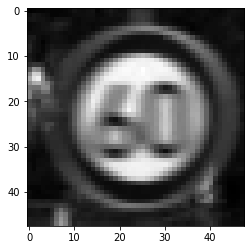

In [ ]:
img = np.random.randint(0, 12660)
plt.imshow(X[img], cmap='gray')
print(classes_dict[y[img]])

In [ ]:
traffic_signs_y['0'].value_counts()

5    2160
4    2100
8    2070
1    1860
0    1410
3    1320
6     780
2     420
9     300
7     240
Name: 0, dtype: int64

Creando conjuntos de entrenamiento y prueba en razon 0.8 y 0.2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [ ]:
[X_train.shape, y_train.shape], [X_test.shape, y_test.shape]

([(10128, 48, 48), (10128,)], [(2532, 48, 48), (2532,)])

speed limit 80 lifted


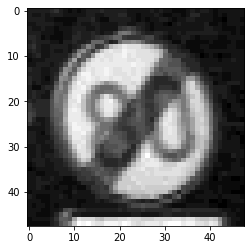

In [ ]:
img = np.random.randint(0, 10128)
plt.imshow(X_train[img], cmap='gray')
print(classes_dict[y_train[img]])

Valores de nuestras imagenes estan entre 0 y 255, normalizamos a valores entre 0 y 1

In [ ]:
X_train[0]

array([[255., 255., 255., ...,  62.,  62.,  62.],
       [255., 255., 255., ...,  63.,  66.,  64.],
       [255., 255., 255., ...,  68.,  70.,  67.],
       ...,
       [254., 255., 254., ..., 252., 252., 253.],
       [254., 255., 254., ..., 253., 253., 253.],
       [254., 255., 253., ..., 252., 253., 252.]])

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

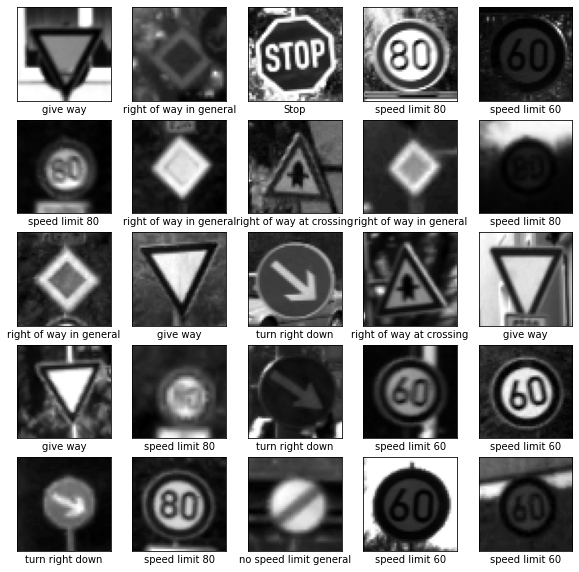

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='gray')
    plt.xlabel(classes_dict[y_train[i]])
plt.show()

## Modelado de red neuronal

In [ ]:
import tensorflow as tf
from tensorflow import keras

Modelamos nuestra red neuronal, que constara de una capa de transformacion de los datos de entrada, de arreglo bidimensional de 48, 48 a unidimensional de 2304, despues una capa oculta con 128 neuronas con funcion de activacion relu, y finalmente una capa de salida con 10 neuronas cuya funcion de activacion dara una probabilidad del 0 al 1 de estar en cada una de las clases. 

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(48, 48)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

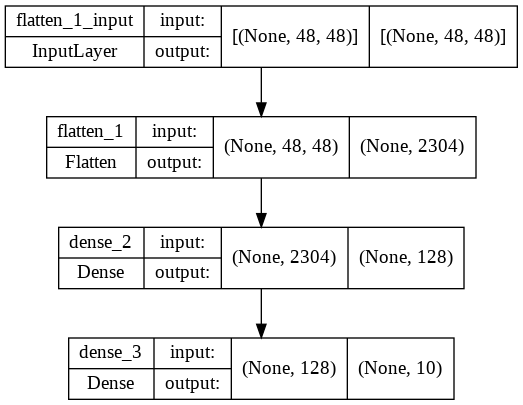

In [ ]:
tf.keras.utils.plot_model(
    model, show_shapes=True, 
    show_layer_names=True)

Utilizaremos optimizador adam, funcion de perdida sparse categorical crossentropy, y la metrica de accuracy. 

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Se observa que la red neuronal en 10 epocas, logra un accuracy del 0.95

In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
317/317 [==============================] - 2s 4ms/step - loss: 1.0492 - accuracy: 0.7074
Epoch 2/10
317/317 [==============================] - 1s 4ms/step - loss: 0.5781 - accuracy: 0.8492
Epoch 3/10
317/317 [==============================] - 1s 4ms/step - loss: 0.4236 - accuracy: 0.8864
Epoch 4/10
317/317 [==============================] - 1s 4ms/step - loss: 0.3622 - accuracy: 0.9044
Epoch 5/10
317/317 [==============================] - 1s 4ms/step - loss: 0.2909 - accuracy: 0.9249
Epoch 6/10
317/317 [==============================] - 1s 4ms/step - loss: 0.2729 - accuracy: 0.9284
Epoch 7/10
317/317 [==============================] - 1s 4ms/step - loss: 0.2333 - accuracy: 0.9387
Epoch 8/10
317/317 [==============================] - 1s 3ms/step - loss: 0.2147 - accuracy: 0.9422
Epoch 9/10
317/317 [==============================] - 1s 4ms/step - loss: 0.2169 - accuracy: 0.9384
Epoch 10/10
317/317 [==============================] - 1s 4ms/step - loss: 0.1657 - accuracy: 0.9567

## Pruebas de red neuronal contra conjunto de prueba

Evaluamos nuestro conjunto de prueba en nuestra red neuronal entrenada e igual obtenemos un buen rendimiento con un accuracy del 0.95

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

80/80 - 0s - loss: 0.1876 - accuracy: 0.9562 - 281ms/epoch - 4ms/step

Test accuracy: 0.9561611413955688


In [ ]:
predictions = model.predict(X_test)

Predecimos las clases para nuestro conjunto de prueba y encontramos que logra acertar la mayoria de los casos, sin embargo aun equivocandose en ciertas ocasiones. 

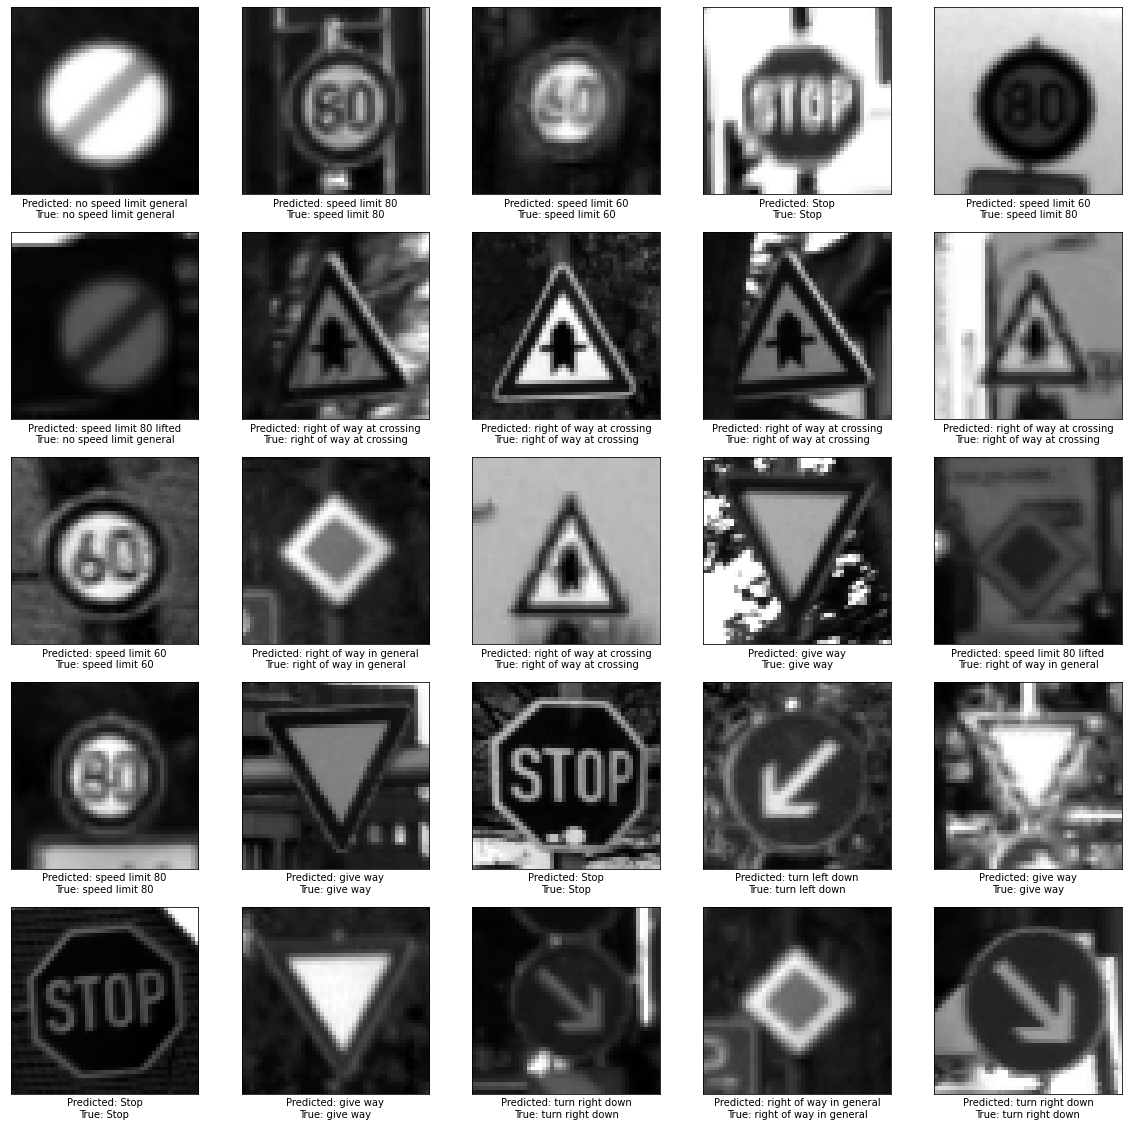

In [ ]:
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap='gray')
    plt.xlabel('Predicted: ' + classes_dict[np.argmax(predictions[i])] + '\nTrue: ' + classes_dict[y_test[i]])
plt.show()

En conclusion, la red neuronal artificial simple logró resolver el problema facilmente con un gran rendimiento en entrenamiento y prueba, y a pesar de ser un ejemplo sencillo logra demostrar la facilidad de la resolucion de problemas que impliquen clasificacion en las redes neuronales. 

Sin embargo, es importante considerar el desbalance de clases en nuestros datos, y para un mejor rendimiento en la vida real debe considerarse un balanceo de clases ya sea en nuestros datasets o conjuntos de entrenamiento. 